In [ ]:
# Importing the libraries that will be used:
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for statistical data visualisation

from sklearn.model_selection import train_test_split # for splitting the data into train and test sets
from sklearn import metrics as mt # for metric modules and evaluations
from sklearn.linear_model import LinearRegression # for linear regression model
from sklearn.preprocessing import StandardScaler # for scaling the features
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score, mean_squared_error # for calculating evaluation metrics

import tensorflow as tf # for the deep learning model
from tensorflow.keras.callbacks import EarlyStopping # for stopping the training early

import warnings # for changing warning filters
warnings.filterwarnings("ignore") # ignoring warnings (cleaner output)

# Uploading the dataset via the commands below:
# from google.colab import files
# files.upload()

In [ ]:
# Importing the dataset
data=pd.read_csv("cs3am_world_happiness_report2019.csv")
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [43]:
# Exploratory Data Analysis

# To see feature names and their general values:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [44]:
# Checking data types and double null values:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [45]:
# Double checking for any null values:
data.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [46]:
# Linear Correlation of the Variables

# First must drop the object data type variable 'country':
dataOnlyFloat = data.copy()
dataOnlyFloat = dataOnlyFloat.select_dtypes(exclude=["object", "int64"])

# Then checking the correlation:
corr = dataOnlyFloat.corr()
corr

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


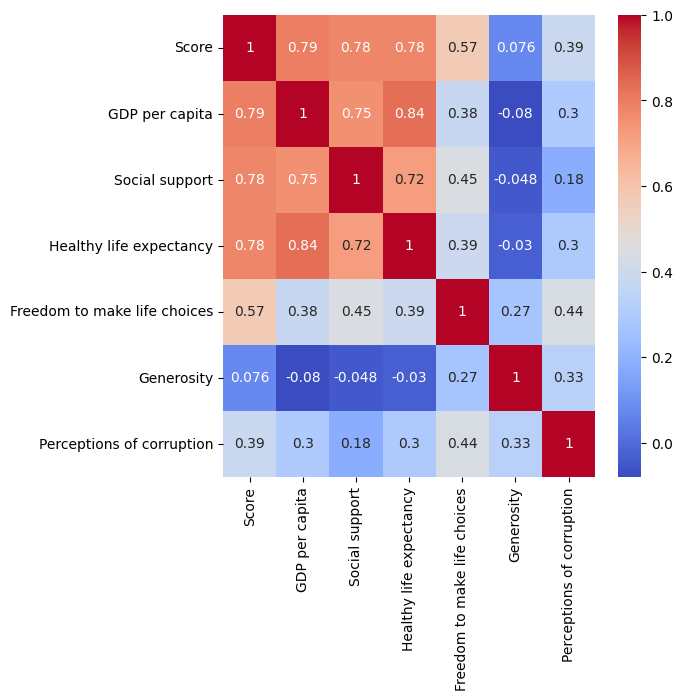

In [ ]:
# Visualising the linear correlation matrix:
plt.subplots(figsize=(6, 6)) 
sns.heatmap(corr, cmap= 'coolwarm', annot=True) 
plt.show()

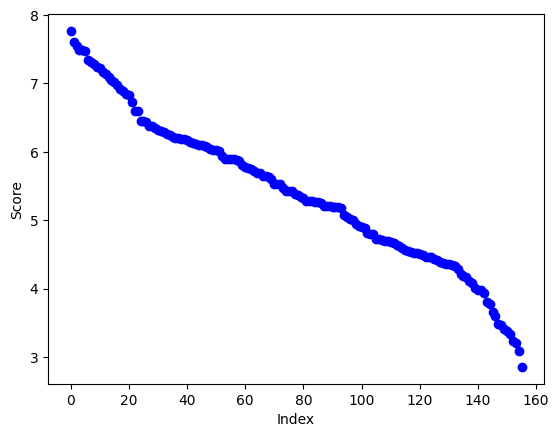

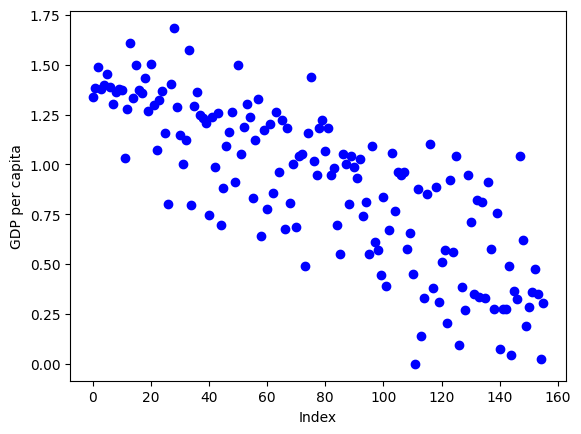

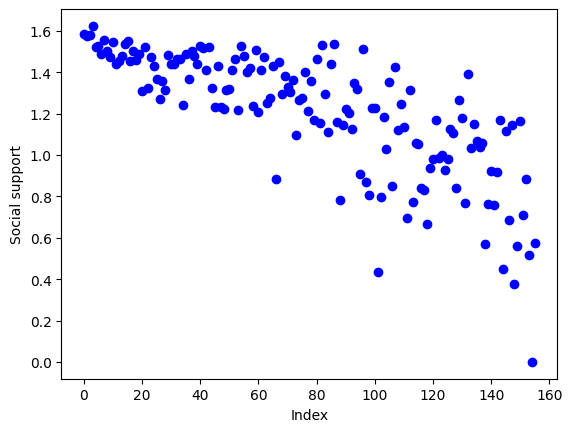

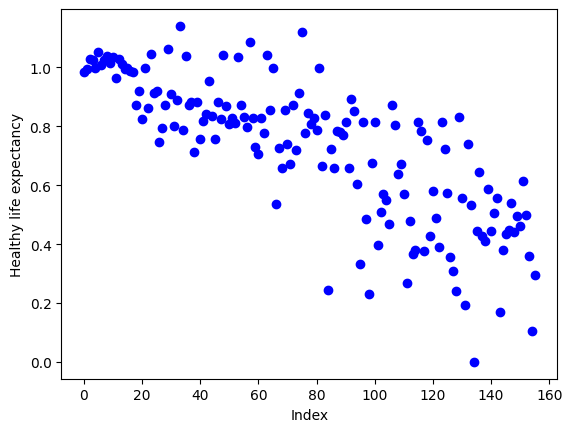

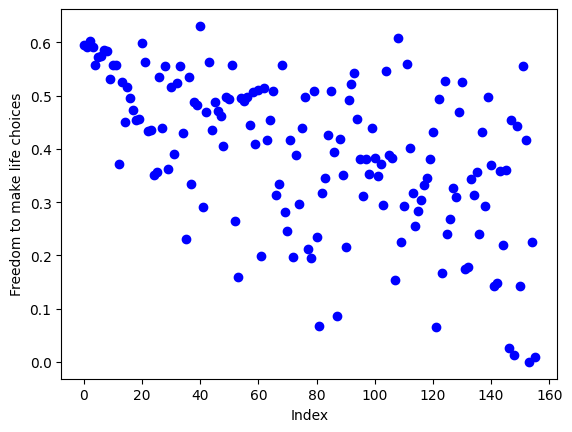

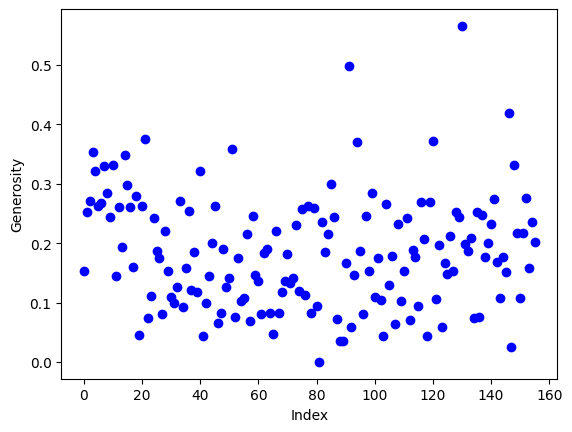

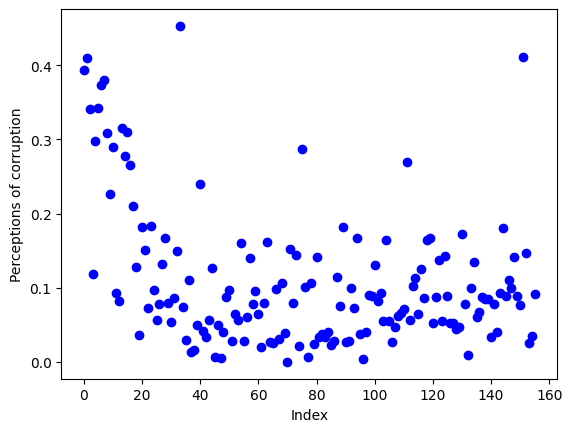

In [ ]:
# Checking for outliers

# for loop for every feature in the data:
for col in dataOnlyFloat.columns:
    plt.plot(data[col], 'o', color="blue") # plot the feature as a circle
    plt.xlabel("Index") 
    plt.ylabel(col) 
    plt.show()


In [ ]:
# Data Preprocessing

# Firstly renaming columns for ease of use and simplicity:
df = data.copy()
df.rename(columns={
    "Overall rank": "rank",
    "Country or region": "country",
    "Score": "score",
    "GDP per capita": "wealth",
    "Social support": "social",
    "Healthy life expectancy": "life expectancy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace=True)

# removing 'rank' column as it will not be needed:
del df["rank"]
del df["country"]

# see changes:
df.sample(5)

,score,wealth,social,life expectancy,freedom,generosity,corruption
132,4.332,0.820,1.390,0.739,0.178,0.187,0.010
94,5.082,0.813,1.321,0.604,0.457,0.370,0.167
110,4.681,0.450,1.134,0.571,0.292,0.153,0.072
18,6.892,1.433,1.457,0.874,0.454,0.280,0.128
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
# Outlier handling

def handle_outliers(df, column_name):

    # This function detects outliers and then replaces them in the specific column via interquartile range.
    # The outliers are replaced with the mean value of the coloumn.

    df_table = df[column_name]

    # calculating the 1st and 3rd data quartiles:
    Q1 = df_table.quantile(0.25)
    Q3 = df_table.quantile(0.75)

    # calculating the interquartile range
    IQR = Q3 - Q1

    # Final calculation of lower and upper bounds for the detection of outliers:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    # Outliers have values that usually fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR

    # Detecting the outliers
    outliers_vector = (df_table < lower_bound) | (df_table > upper_bound)

    # Getting indicies of the outliers detected:
    outliers_vector = df_table[outliers_vector]

    # Replacing with the mean value of the column:
    df[column_name].iloc[outliers_vector.index.values] = df[column_name].mean()

    print(f"Replaced outliers with the mean of {column_name}: {df[column_name].iloc[outliers_vector.index.values]}")
    
    return df

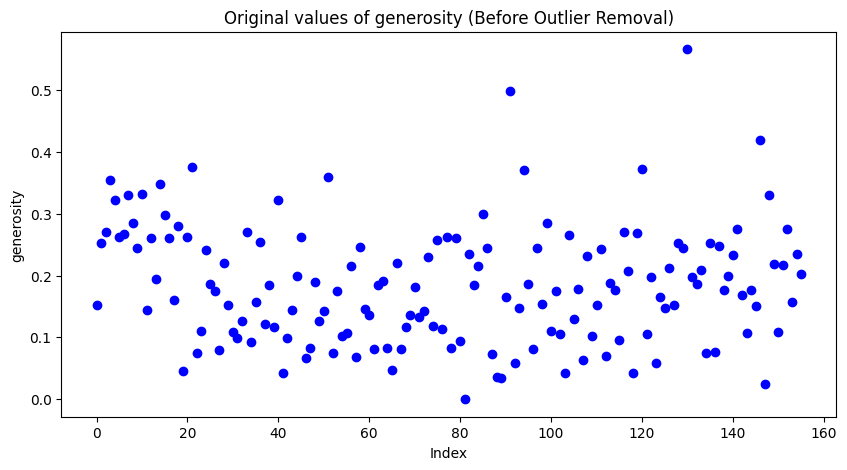

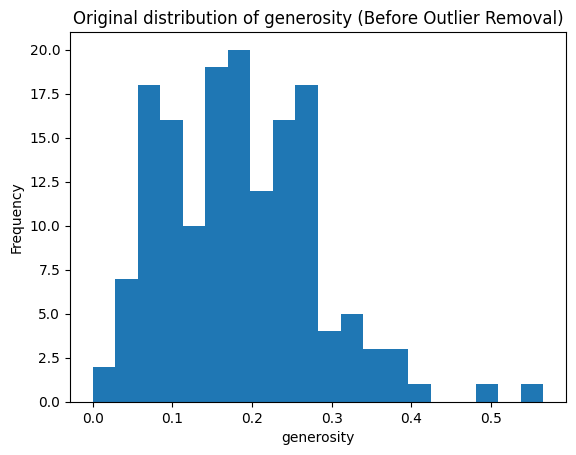

Lower bound: -0.10050000000000002
Upper bound: 0.4575
Q1: 0.10875
Q3: 0.24825
Replaced outliers with the mean of generosity: 91     0.184846
130    0.184846
Name: generosity, dtype: float64


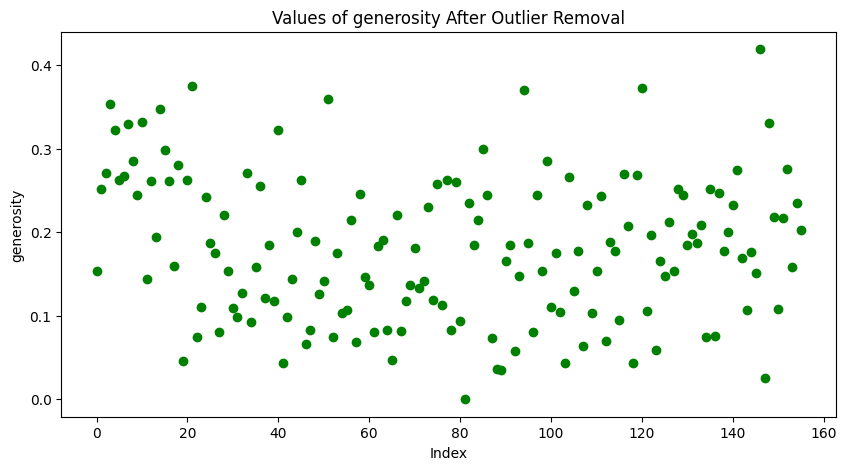

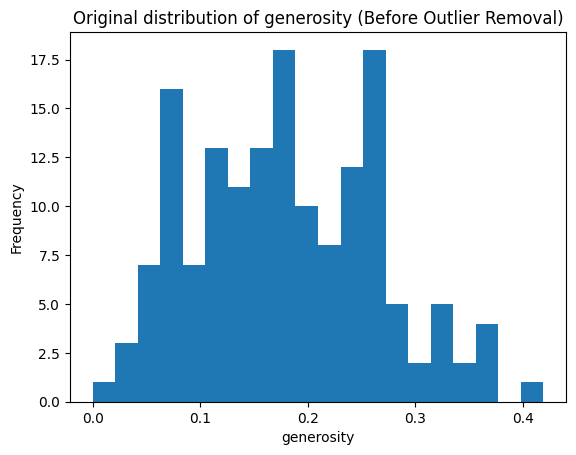

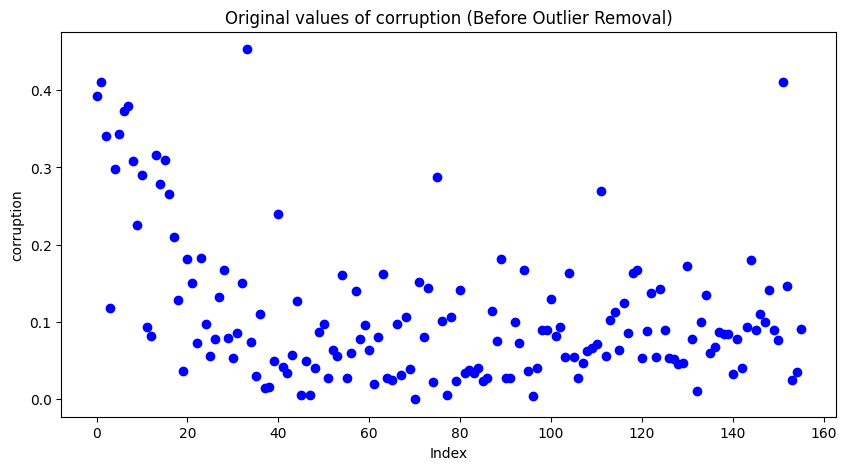

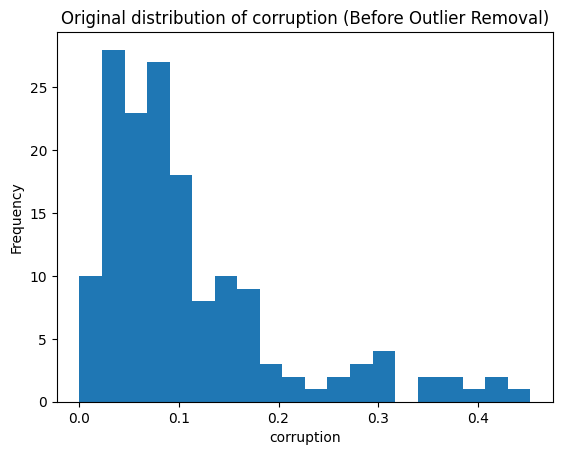

Lower bound: -0.09437499999999997
Upper bound: 0.28262499999999996
Q1: 0.047
Q3: 0.14125
Replaced outliers with the mean of corruption: 0      0.110603
1      0.110603
2      0.110603
4      0.110603
5      0.110603
6      0.110603
7      0.110603
8      0.110603
10     0.110603
13     0.110603
15     0.110603
33     0.110603
75     0.110603
151    0.110603
Name: corruption, dtype: float64


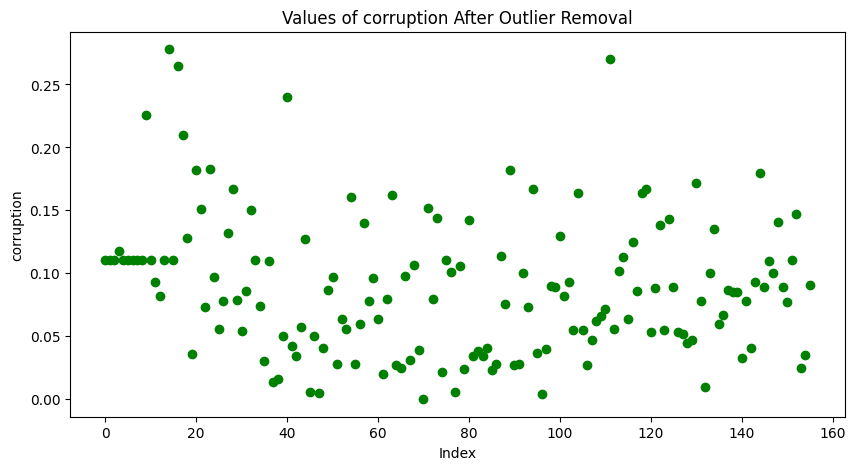

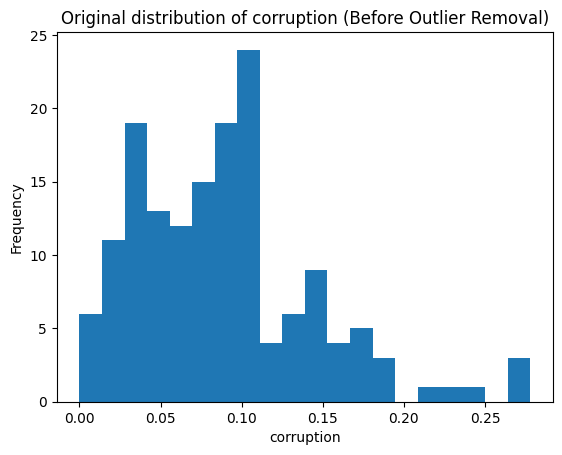

In [ ]:
columns_to_check = ["generosity", "corruption"]

df_cleaned = df.copy() 

for col in columns_to_check:
      # plot the data to visualize outliers
    plt.figure(figsize=(10, 5))
    plt.plot(df_cleaned[col], 'o', color="blue")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.title(f"Original values of {col} (Before Outlier Removal)")
    plt.show()

    plt.hist(df_cleaned[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f"Original distribution of {col} (Before Outlier Removal)")
    plt.show()

    df_cleaned = handle_outliers(df_cleaned, col)

    #  see the changes 
    plt.figure(figsize=(10, 5))
    plt.plot(df_cleaned[col], 'o', color="green")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.title(f"Values of {col} After Outlier Removal")
    plt.show()

    plt.hist(df_cleaned[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f"Original distribution of {col} (Before Outlier Removal)")
    plt.show()


In [ ]:
# Scaling the data - using the data where outliers were removed

scaler = StandardScaler()

# Standardize the data (excluding the target variable if needed)
df_scaledAndCleaned = df_cleaned.copy()
df_scaledAndCleaned = pd.DataFrame(scaler.fit_transform(df_scaledAndCleaned), columns=df_scaledAndCleaned.columns)

df_scaledAndCleaned.describe()

,score,wealth,social,life expectancy,freedom,generosity,corruption
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,-7.287618e-16,-1.366428e-16,-1.366428e-16,-3.643809e-16,-2.732857e-16,7.401487e-17,-8.540177e-17
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-2.301928e+00,-2.279334e+00,-4.053282e+00,-3.004986e+00,-2.748526e+00,-2.092037e+00,-1.625511e+00
25%,-7.774313e-01,-7.614944e-01,-5.132402e-01,-7.354299e-01,-5.921083e-01,-8.308687e-01,-7.674312e-01
50%,-2.487156e-02,1.381292e-01,2.101925e-01,2.641694e-01,1.710395e-01,-3.357854e-02,-6.453576e-02
75%,7.006501e-01,8.243362e-01,8.171048e-01,6.484713e-01,8.029119e-01,7.521146e-01,3.937624e-01
max,2.128711e+00,1.961299e+00,1.392163e+00,1.722652e+00,1.669330e+00,2.767084e+00,3.449941e+00


In [53]:
# Scaling the data - using the data before any removal of outliers to check if the outliers affect the results

df_scaled = df.copy()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled.describe()

,score,wealth,social,life expectancy,freedom,generosity,corruption
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,-7.287618e-16,-1.366428e-16,-1.366428e-16,-3.643809e-16,-2.732857e-16,2.135044e-16,-6.832142e-17
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-2.301928e+00,-2.279334e+00,-4.053282e+00,-3.004986e+00,-2.748526e+00,-1.946801e+00,-1.173697e+00
25%,-7.774313e-01,-7.614944e-01,-5.132402e-01,-7.354299e-01,-5.921083e-01,-8.014454e-01,-6.749404e-01
50%,-2.487156e-02,1.381292e-01,2.101925e-01,2.641694e-01,1.710395e-01,-7.736976e-02,-2.663845e-01
75%,7.006501e-01,8.243362e-01,8.171048e-01,6.484713e-01,8.029119e-01,6.677699e-01,3.252258e-01
max,2.128711e+00,1.961299e+00,1.392163e+00,1.722652e+00,1.669330e+00,4.014316e+00,3.633468e+00


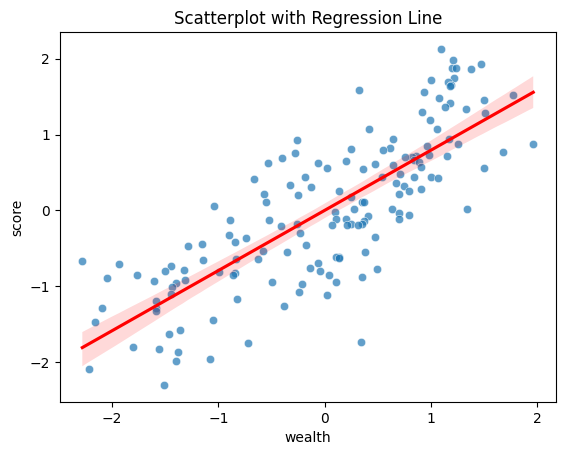

In [54]:
# Machine Learning Model 1 - Simple Linear Regression

# First visualising the regression line via a scatterplot:
sns.scatterplot(x="wealth", y="score", data=df_scaledAndCleaned, alpha=0.7)
sns.regplot(x="wealth", y="score", data=df_scaledAndCleaned, scatter=False, color="red")
plt.title("Scatterplot with Regression Line")
plt.show()

In [ ]:
# First Linear Regression Model - using the data after scaling and cleaning

x = df_scaledAndCleaned.drop(['score'], axis=1) # axis = 1 to drop data by column
# 'x' dataframe that only holds the independent/explanatory variables execpt the target variable 'score'

y = df_scaledAndCleaned['score']
# 'y' dataframe that only holds the dependent/target variable 'score'

# Split the data into training and testing sets:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)
# 'x' being the features, 'y' being target variable, 10% of data for testing, 90% of data for training

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

lm = LinearRegression()

# fit the model by passing the independent and dependent 
lm.fit(train_x, train_y)

predicted_y = lm.predict(test_x)

(140, 6)
(16, 6)
(140,)
(16,)


In [ ]:
# First Model Evaluation

print("\nTest Error Evaluation:")
print("1) The Mean Absolute Error of model:", np.round(mt.mean_absolute_error(test_y, predicted_y), 2))
print("2) The model explains,", np.round(mt.explained_variance_score(test_y, predicted_y) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(mt.r2_score(test_y, predicted_y), 2))

# Then predict for the training data
train_predicted_y = lm.predict(train_x)

print("\nTrain Error Evaluation:")
print("1) The Mean Absolute Error of model:", np.round(mt.mean_absolute_error(train_y, train_predicted_y), 2))
print("2) The model explains,", np.round(mt.explained_variance_score(train_y, train_predicted_y) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(mt.r2_score(train_y, train_predicted_y), 2))


Test Error Evaluation:
1) The Mean Absolute Error of model: 0.37
2) The model explains, 74.43 % variance
3) The R-Square score of the model: 0.68

Train Error Evaluation:
1) The Mean Absolute Error of model: 0.38
2) The model explains, 78.81 % variance
3) The R-Square score of the model: 0.79


In [ ]:
# Second Linear Regression Model - using only the scaled data without any cleaning

# Now to split into train/test via:
x = df_scaled.drop(['score'], axis=1)

y = df_scaled['score']

# Split
train_x_scaled, test_x_scaled, train_y_scaled, test_y_scaled = train_test_split(x, y, test_size=0.1, random_state=42)

print(train_x_scaled.shape)
print(test_x_scaled.shape)
print(train_y_scaled.shape)
print(test_y_scaled.shape)

lm_scaled = LinearRegression()

# fit the model by passing the independent and  dependent
lm_scaled.fit(train_x_scaled, train_y_scaled)

predicted_y_scaled = lm_scaled.predict(test_x_scaled)

(140, 6)
(16, 6)
(140,)
(16,)


In [ ]:
# Second Model Evaluation - Slight improvement when not removing outiers.

print("\nTest Error Evaluation:")
print("1) The Mean Absolute Error of model", np.round(mt.mean_absolute_error(test_y_scaled, predicted_y_scaled), 2))
print("2) The model explains,", np.round(mt.explained_variance_score(test_y_scaled, predicted_y_scaled) * 100, 2), "% variance")
print("3) The R-Square score of the model", np.round(mt.r2_score(test_y_scaled, predicted_y_scaled), 2))

train_predicted_y_scaled = lm.predict(train_x)

print("\nTrain Error Evaluation:")
print("1) The Mean Absolute Error of model:", np.round(mt.mean_absolute_error(train_y_scaled, train_predicted_y_scaled), 2))
print("2) The model explains,", np.round(mt.explained_variance_score(train_y_scaled, train_predicted_y_scaled) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(mt.r2_score(train_y_scaled, train_predicted_y_scaled), 2))


Test Error Evaluation:
1) The Mean Absolute Error of model 0.35
2) The model explains, 76.16 % variance
3) The R-Square score of the model 0.71

Train Error Evaluation:
1) The Mean Absolute Error of model: 0.38
2) The model explains, 78.81 % variance
3) The R-Square score of the model: 0.79


In [ ]:
# Final Linear Regression Model - major improvement as results of evaluation are consistently good.

from sklearn.model_selection import KFold, cross_val_predict

# K-Folds Cross-Validation setup (for comparison)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

predictions = cross_val_predict(lm_scaled, x, y, cv=kf)

print("\nK-Folds Evaluation:")
print("1) The Mean Absolute Error of model:", np.round(mt.mean_absolute_error(y, predictions), 2))
print("2) The model explains,", np.round(mt.explained_variance_score(y, predictions) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(mt.r2_score(y, predictions), 2))


K-Folds Evaluation:
1) The Mean Absolute Error of model: 0.39
2) The model explains, 75.89 % variance
3) The R-Square score of the model: 0.76


In [ ]:
# Model Parameters

# The training model here represents learning the parameters of the multivariate linear regression model
# 𝑦 = ℎ𝜃 (𝑥) = 𝜃0𝑥0 + 𝜃1𝑥1 + 𝜃2𝑥2 + 𝜃3𝑥3 + ⋯ + 𝜃10𝑥10

coeff = pd.Series(lm_scaled.coef_, index = train_x_scaled.columns)
intercept = lm_scaled.intercept_
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

# From the output, can see that the equation for the regression would be:
# Happiness scoring = 1.63 + 0.68 ∗ wealth + 1.25 ∗ social + ... + 0.94 ∗ corruption

Coefficients:

wealth             0.274125
social             0.312133
life expectancy    0.230720
freedom            0.183946
generosity         0.050938
corruption         0.071150
dtype: float64


Intercept:

0.01903606322401955




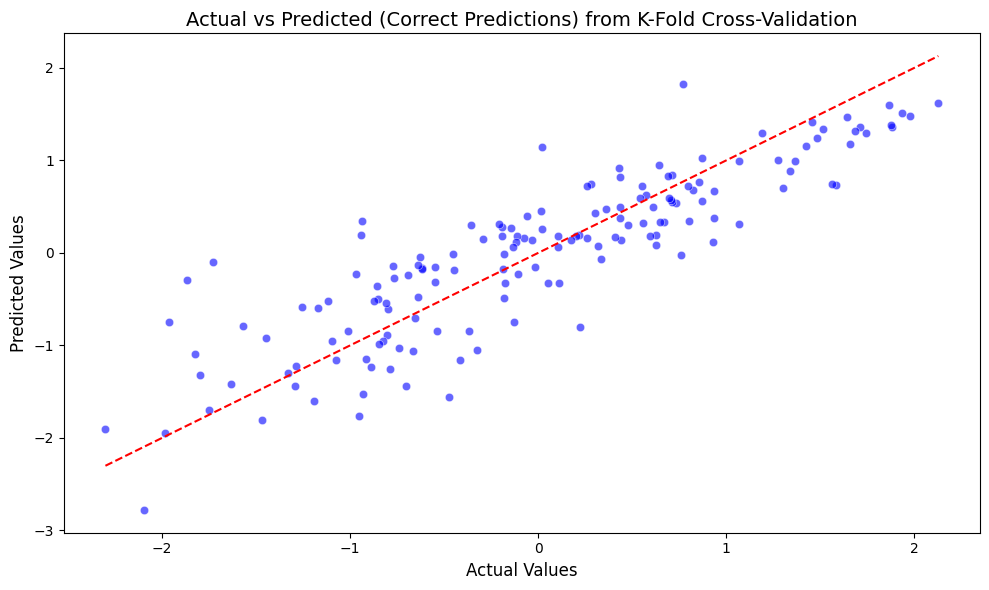

In [ ]:
# Visualising the Linear Regression model's prediction performance

# Calculate the residuals:
residuals = predictions - y
# the difference between predicted and actual values

# Create a new dataframe to store the actual values and predictions:
df_predictions = pd.DataFrame({'Actual': y, 'Predicted': predictions, 'Residual': residuals})

# Plot the correctly predicted values (where the residual is close to 0):
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values:
sns.scatterplot(x=df_predictions['Actual'], y=df_predictions['Predicted'], color='blue', alpha=0.6)

# Plot the line where actual = predicted:
plt.plot([df_predictions['Actual'].min(), df_predictions['Actual'].max()],
         [df_predictions['Actual'].min(), df_predictions['Actual'].max()], color='red', linestyle='--')

plt.title('Actual vs Predicted (Correct Predictions) from K-Fold Cross-Validation', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

plt.tight_layout()
plt.show()


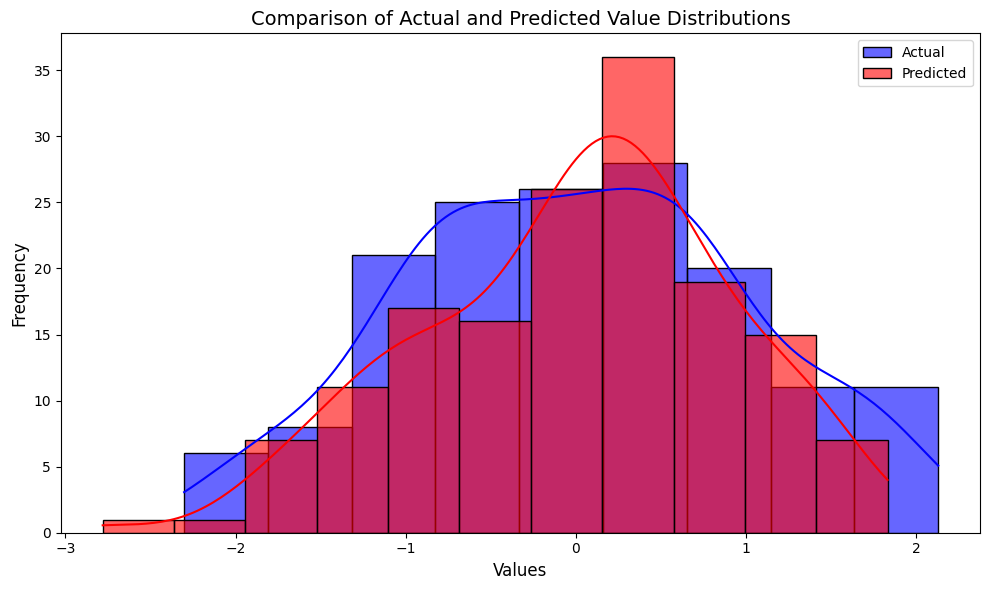

In [62]:
# Alternative visualisation of actual versus predicted values hist plot:

plt.figure(figsize=(10, 6))
sns.histplot(df_predictions['Actual'], color='blue', label='Actual', kde=True, alpha=0.6)
sns.histplot(df_predictions['Predicted'], color='red', label='Predicted', kde=True, alpha=0.6)
plt.legend()
plt.title('Comparison of Actual and Predicted Value Distributions', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

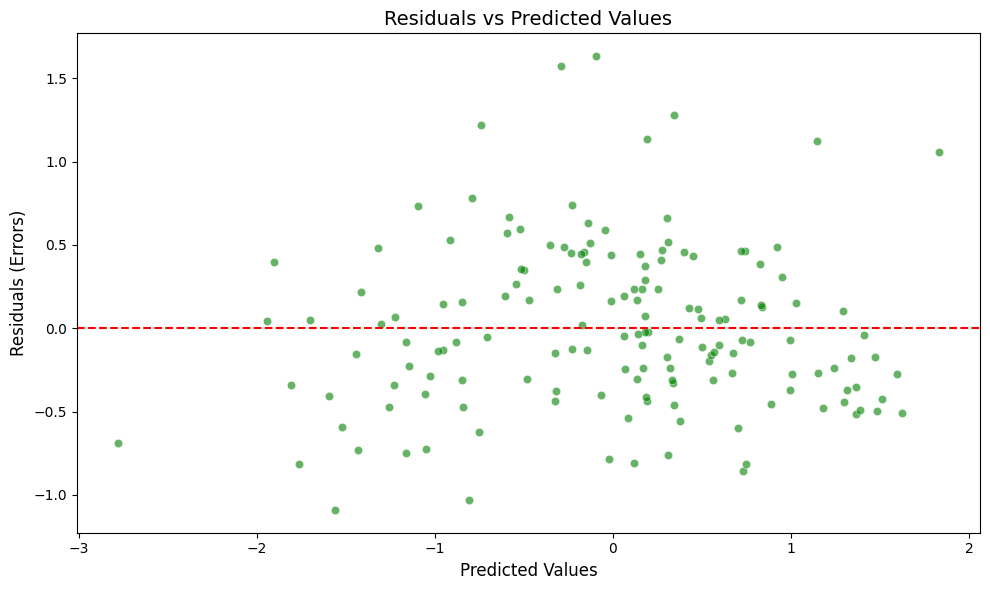

In [ ]:
# Residual plot to check if residuals are randomly distributed

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_predictions['Predicted'], y=df_predictions['Residual'], color='green', alpha=0.6)

# Add horizontal line at 0 to represent no error:
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Machine Learning Model 2 - Deep Learning using TensorFlow

# First Deep Learning Model - using scaled and cleaned data
features = ['wealth', 'social', 'life expectancy',
            'freedom', 'generosity', 'corruption']
target = 'score'

# independent variables (X) and target variable (y):
X = df_scaledAndCleaned[features]
y = df_scaledAndCleaned[target]

# Checking that X and y have the same number of samples:
print(X.shape)  # Should print (156, 6)
print(y.shape)  # Should print (156,)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Building the model architecture:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # X_train.shape[1] is the number of features
    tf.keras.layers.Dense(64, activation='relu'),  # First hidden layer with 64 neurons
    tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    tf.keras.layers.Dense(1, activation='linear')  # Output layer (linear activation for regression)
])

model.compile(optimizer='adam', # optimizer that will be used - 'adam'
              loss='mean_squared_error',  # Mean squared error for regression tasks
              metrics=['mae'])  # Mean absolute error metric for performance evaluation

model.summary()
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
# For 30 epochs with batch size of 32 and validation split of 0.2

(156, 6)
(156,)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 1.1335 - mae: 0.8542 - val_loss: 1.1867 - val_mae: 0.8313
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7989 - mae: 0.7037 - val_loss: 0.9912 - val_mae: 0.7542
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7376 - mae: 0.6755 - val_loss: 0.8383 - val_mae: 0.7060
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5950 - mae: 0.6129 - val_loss: 0.7098 - val_mae: 0.6510
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4481 - mae: 0.5192 - val_loss: 0.6015 - val_mae: 0.5975
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3883 - mae: 0.4605 - val_loss: 0.5062 - val_mae: 0.5526
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3873 - mae: 0.4620 - val_loss: 0.4240 - val_mae: 0.5137
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2977 - mae: 0.4089 - val_loss: 0.3564 - val_mae: 0.4771
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2700 - mae: 0.3921 -

In [ ]:
# First Deep Learning Model Evaluation

# Firstly making predictions on test set:
predictions = model.predict(X_test)
# Then flattening the predictions in case they are 2D to match them to shape shape of y_test which is 1D If the predictions are 2D
predictions = predictions.flatten()

print("1) The Mean Absolute Error of model:", np.round(mean_absolute_error(y_test, predictions), 2))
print("2) The model explains,", np.round(explained_variance_score(y_test, predictions) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(r2_score(y_test, predictions), 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1) The Mean Absolute Error of model: 0.34
2) The model explains, 83.74 % variance
3) The R-Square score of the model: 0.73


In [ ]:
# Second Deep Learning Model - using scaled and cleaned data and removing 'social' and 'generosity'

features = ['wealth', 'life expectancy',
            'freedom', 'corruption']

X_ = df_scaledAndCleaned[features]
y = df_scaledAndCleaned[target]

print(X.shape)  # Should print (156, 6)
print(y.shape)  # Should print (156,)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.1, random_state=42)

# Build the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # X_train.shape[1] is the number of features
    tf.keras.layers.Dense(64, activation='relu'),  # First hidden layer with 64 neurons
    tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    tf.keras.layers.Dense(1, activation='linear')  # Output layer (linear activation for regression)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',  # Mean squared error for regression tasks
              metrics=['mae'])  # Mean absolute error metric for performance evaluation

model.summary()
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

(156, 6)
(156,)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - loss: 1.0989 - mae: 0.8520 - val_loss: 1.0417 - val_mae: 0.7951
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8841 - mae: 0.7628 - val_loss: 0.8361 - val_mae: 0.7116
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6934 - mae: 0.6793 - val_loss: 0.6738 - val_mae: 0.6398
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.6271 - mae: 0.6146 - val_loss: 0.5460 - val_mae: 0.5784
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4410 - mae: 0.5199 - val_loss: 0.4493 - val_mae: 0.5263
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3748 - mae: 0.4828 - val_loss: 0.3804 - val_mae: 0.4867
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.3432 - mae: 0.4579 - val_loss: 0.3289 - val_mae: 0.4606
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2860 - mae: 0.4007 - val_loss: 0.2933 - val_mae: 0.4377
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2620 - mae: 0.3942 -

In [ ]:
# Second Deep Learning Model Evaluation - best resulting

predictions = model.predict(X_test)
predictions_flat = predictions.flatten()

print("1) The Mean Absolute Error of model:", np.round(mean_absolute_error(y_test, predictions), 2))
print("2) The model explains,", np.round(explained_variance_score(y_test, predictions) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(r2_score(y_test, predictions), 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1) The Mean Absolute Error of model: 0.31
2) The model explains, 78.17 % variance
3) The R-Square score of the model: 0.76


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


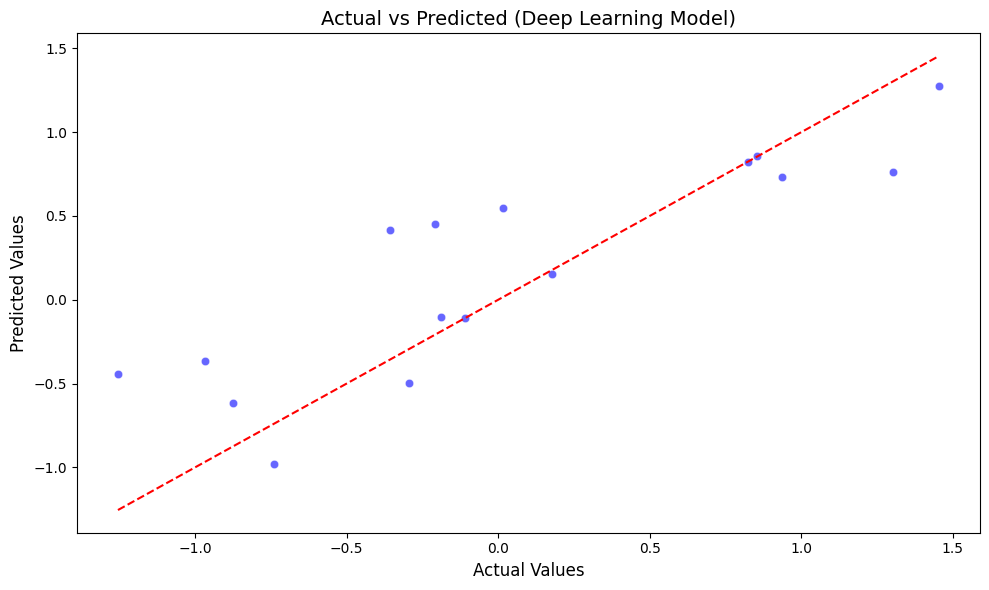

In [ ]:
# Flatten predictions and actual values to 1D
predictions = model.predict(X_test).flatten()  
actual_values = y_test.values 

# Create a DataFrame to store actual vs predicted values
df_predictions = pd.DataFrame({'Actual': actual_values, 'Predicted': predictions})

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_predictions['Actual'], y=df_predictions['Predicted'], color='blue', alpha=0.6)

# Plot the reference line where Actual = Predicted
plt.plot([df_predictions['Actual'].min(), df_predictions['Actual'].max()],
         [df_predictions['Actual'].min(), df_predictions['Actual'].max()], color='red', linestyle='--')

plt.title('Actual vs Predicted (Deep Learning Model)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


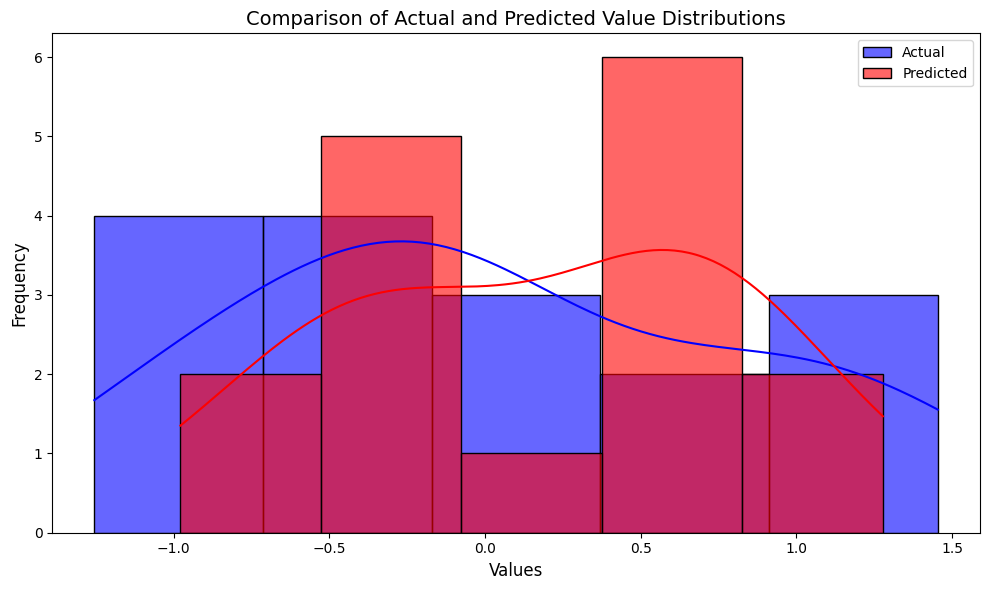

In [ ]:
# Make predictions with the deep learning model
predictions = model.predict(X_test).flatten()  # Flatten to a 1D array if necessary

df_predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})

# Alternative visualization: Histogram comparison of Actual vs Predicted distributions
plt.figure(figsize=(10, 6))

# Plot Actual values
sns.histplot(df_predictions['Actual'], color='blue', label='Actual', kde=True, alpha=0.6)

# Plot Predicted values
sns.histplot(df_predictions['Predicted'], color='red', label='Predicted', kde=True, alpha=0.6)

plt.legend()
plt.title('Comparison of Actual and Predicted Value Distributions', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


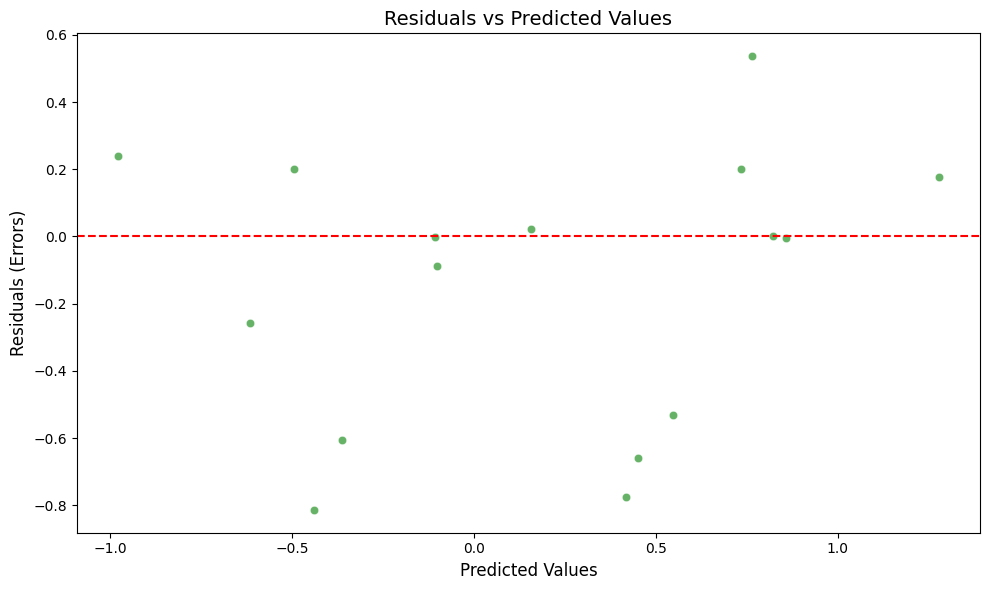

In [ ]:
# residuals
df_predictions['Residual'] = df_predictions['Actual'] - df_predictions['Predicted']

# Predicted vs Residuals
plt.figure(figsize=(10, 6))

# Scatter plot of Predicted vs Residuals
sns.scatterplot(x=df_predictions['Predicted'], y=df_predictions['Residual'], color='green', alpha=0.6)

plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)

plt.tight_layout()
plt.show()


In [73]:
# Modifying the training parameters and then retraining the model:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)



Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2105 - mae: 0.3542 - val_loss: 0.3646 - val_mae: 0.5158
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2151 - mae: 0.3577 - val_loss: 0.3633 - val_mae: 0.5212
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1704 - mae: 0.3256 - val_loss: 0.3602 - val_mae: 0.5202
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1408 - mae: 0.2921 - val_loss: 0.3700 - val_mae: 0.5243
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1546 - mae: 0.3088 - val_loss: 0.3687 - val_mae: 0.5260
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1538 - mae: 0.3070 - val_loss: 0.3641 - val_mae: 0.5250
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1642 - mae: 0.3089 - val_loss: 0.3675 - val_mae: 0.5236
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1492 - mae: 0.2990 - val_loss: 0.3728 - val_mae: 0.5290
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1329 - mae: 0.2843 - val_loss

In [ ]:
# Evaluation of modified training parameters - slightly worse results.

predictions = model.predict(X_test)
predictions = predictions.flatten()

print("1) The Mean Absolute Error of model:", np.round(mean_absolute_error(y_test, predictions), 2))
print("2) The model explains,", np.round(explained_variance_score(y_test, predictions) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(r2_score(y_test, predictions), 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1) The Mean Absolute Error of model: 0.33
2) The model explains, 73.73 % variance
3) The R-Square score of the model: 0.72


In [ ]:
# Final Deep Learning Model - with Batch Normalization and Early Stopping

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001  )
model.compile(optimizer=optimizer,
              loss='mean_squared_error', 
              metrics=['mae'])  

model.summary()

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 1.2812 - mae: 0.9017 - val_loss: 0.9328 - val_mae: 0.7855
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6944 - mae: 0.6658 - val_loss: 0.8659 - val_mae: 0.7532
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7643 - mae: 0.6674 - val_loss: 0.8387 - val_mae: 0.7443
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9452 - mae: 0.7392 - val_loss: 0.8399 - val_mae: 0.7499
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5036 - mae: 0.5726 - val_loss: 0.8432 - val_mae: 0.7540
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3749 - mae: 0.5064 - val_loss: 0.8562 - val_mae: 0.7603
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4592 - mae: 0.5109 - val_loss: 0.8457 - val_mae: 0.7546
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4411 - mae: 0.5049 - val_loss: 0.8295 - val_mae: 0.7464
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4422 - mae:

In [ ]:
# Evaluation of new model

predictions = model.predict(X_test)
predictions = predictions.flatten()

print("1) The Mean Absolute Error of model:", np.round(mean_absolute_error(y_test, predictions), 2))
print("2) The model explains,", np.round(explained_variance_score(y_test, predictions) * 100, 2), "% variance")
print("3) The R-Square score of the model:", np.round(r2_score(y_test, predictions), 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1) The Mean Absolute Error of model: 0.49
2) The model explains, 50.32 % variance
3) The R-Square score of the model: 0.46
